<h1>CNN</h1>

**Implementation of CNN to predict numbers from Hand-Written number images.**

In [3]:
from keras.datasets import mnist

# to load Handwritten -dataset of numbers

In [4]:
from tensorflow.keras.utils import to_categorical

In [5]:
from keras.models import Sequential

In [6]:
from keras.layers import Conv2D,Flatten,Dense

In [7]:
import matplotlib.pyplot as plt

In [8]:
# splitting data into trainning and testing 

(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [9]:
X_train.shape

# we have 60,000 images in trainning set with 28 * 28 pixels

(60000, 28, 28)

In [10]:
X_test.shape

(10000, 28, 28)

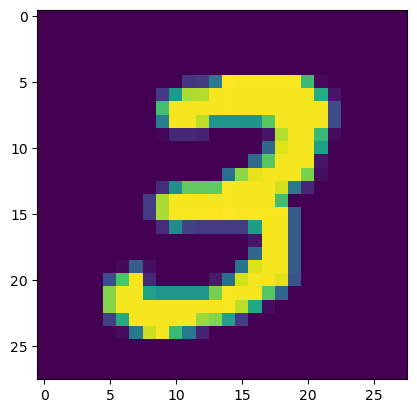

In [11]:
plt.imshow(X_train[7])

In [13]:
print(y_train[7])

# label of above img pic

3


9


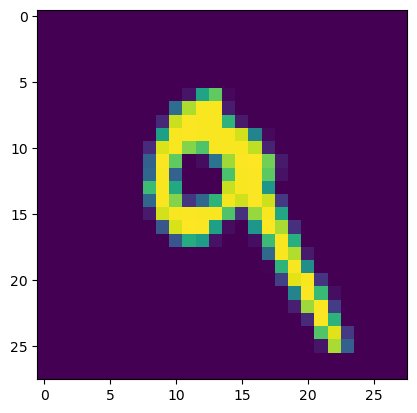

In [14]:
plt.imshow(X_test[7])

print(y_test[7])

In [15]:
# now reshaping data , to consider single pixel as a single data-point

X_train = X_train.reshape(60000, 28, 28, 1)

In [16]:
X_test = X_test.reshape(10000, 28,28, 1)

In [18]:
y_train[0]

# our labels are in Scalar form.

5

In [19]:
# convert labels into categorical form , so wil get labels in Vector form.(Multiclass Classification)

y_train = to_categorical(y_train)

In [20]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [21]:
y_test = to_categorical(y_test)

In [22]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

**Converted Labels into vector format.**

In [23]:
# Now lets build our neural network

cnnmodel = Sequential()

# adding first layer to feture selection of image

cnnmodel.add(Conv2D(64, kernel_size=3, activation='relu', input_shape = (28, 28, 1)))

cnnmodel.add(Conv2D(32, kernel_size=3, activation='relu'))

# to convert above metrix image features into vector form
cnnmodel.add(Flatten())


# final layer(output layer) we have 10-classes

cnnmodel.add(Dense(10, activation='softmax'))

In [24]:
cnnmodel.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics='accuracy')

In [25]:
cnnmodel.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2407 - accuracy: 0.9524 - val_loss: 0.0742 - val_accuracy: 0.9760
Epoch 2/3
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0675 - accuracy: 0.9791 - val_loss: 0.0784 - val_accuracy: 0.9776
Epoch 3/3
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0466 - accuracy: 0.9847 - val_loss: 0.0829 - val_accuracy: 0.9793


In [26]:
print(cnnmodel.predict(X_test[:3]))

1/1 [==============================] - 0s 129ms/step
[[2.9504066e-10 1.6774651e-14 4.0087491e-07 4.8139162e-04 5.1641579e-14
  2.9976830e-12 1.0104365e-15 9.9951828e-01 2.1758306e-09 6.7793951e-11]
 [3.8350524e-11 3.4121570e-11 1.0000000e+00 3.6001296e-11 1.8625418e-12
  1.2600941e-14 4.2027248e-09 6.4825066e-13 2.8194695e-11 1.0769996e-18]
 [2.1416695e-06 9.9970019e-01 2.6215343e-06 2.5716715e-09 6.8861162e-05
  4.9308422e-08 2.3192154e-06 1.2432079e-07 2.2380873e-04 1.0518272e-08]]


In [27]:
print(y_test[:3])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
